In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavanitejasri","key":"3b930f82b8d8a0892685a397a2049dcd"}'}

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

# Make sure the Kaggle API is correctly configured
!pip install kaggle


In [ ]:
!chmod 600 /content/kaggle.json


In [ ]:
!kaggle datasets download -d mdsagorahmed/fruit-image-dataset-22-classes


Dataset URL: https://www.kaggle.com/datasets/mdsagorahmed/fruit-image-dataset-22-classes
License(s): CC0-1.0


In [ ]:
import zipfile
with zipfile.ZipFile('fruit-image-dataset-22-classes.zip', 'r') as zip_ref:
    zip_ref.extractall('fruit_dataset')


In [ ]:
import zipfile
dataset_zip_path = '/content/fruit-image-dataset-22-classes.zip'  # Path to the downloaded ZIP file
extract_path = '/content/fruit_dataset'  # Folder where the dataset will be extracted

# Extract the ZIP file
with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check the contents of the extracted folder
print("Extraction complete. Checking folder structure:")
print(os.listdir(extract_path))




Extraction complete. Checking folder structure:
['Ripe & Unripe Fruits']


In [ ]:
dataset_dir = '/content/fruit_dataset/Ripe & Unripe Fruits'
print(os.listdir(dataset_dir))  # List the subfolders (which should correspond to the fruit types)


['unripe pomegranate', 'ripe banana', 'unripe lemon', 'ripe strawberry', 'ripe papaya', 'ripe pomegranate', 'unripe strawberry', 'unripe grapes', 'unripe mango', 'unripe apple', 'unripe papaya', 'ripe mango', 'unripe pineapple', 'ripe lemon', 'unripe dragon', 'ripe grapes', 'unripe orange', 'ripe apple', 'unripe banana', 'ripe orange', 'ripe dragon', 'ripe pineapple']


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

# Define image dimensions
img_width, img_height = 150, 150  # Resize images to 150x150

# Load images and labels (assuming you have done this already)
def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for file_name in os.listdir(label_dir):
                if file_name.endswith('.jpg') or file_name.endswith('.png'):
                    img_path = os.path.join(label_dir, file_name)
                    img = image.load_img(img_path, target_size=(img_width, img_height))
                    img_array = image.img_to_array(img) / 255.0  # Normalize images
                    images.append(img_array)
                    labels.append(label)
    return np.array(images), np.array(labels)

dataset_dir = '/content/fruit_dataset/Ripe & Unripe Fruits'
images, labels = load_images_from_directory(dataset_dir)

# Encode the labels (convert fruit names to integers)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build a simple CNN model
model = models.Sequential([
    layers.Input(shape=(img_width, img_height, 3)),  # Use Input() for input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(labels)), activation='softmax')  # Output layer with the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         2,838 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,831,190 (18.43 MB)

 Trainable params: 4,831,190 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for the training data
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to between 0 and 1
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# We only rescale the test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Fit the generator on the training data
datagen.fit(X_train)


In [ ]:
import os

# Example class folder: ripe banana
class_folder = '/content/fruit_dataset/Ripe & Unripe Fruits/ripe banana'

# List all image files in the folder
image_files = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Show some filenames
print("Found images:", image_files[:5])  # Print first 5 image filenames


Found images: ['178.jpg', '121.jpg', '245.jpg', '87.jpg', '227.jpg']


In [ ]:
model.input_shape


(None, 150, 150, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 128, 128  # Pick a consistent size

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/fruit_dataset/Ripe & Unripe Fruits',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/fruit_dataset/Ripe & Unripe Fruits',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6975 images belonging to 22 classes.
Found 1738 images belonging to 22 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(img_width, img_height, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=10)


Epoch 1/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.1219 - loss: 2.8881 - val_accuracy: 0.2238 - val_loss: 2.4398
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.2562 - loss: 2.4081 - val_accuracy: 0.2796 - val_loss: 2.3054
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.3377 - loss: 2.1258 - val_accuracy: 0.3015 - val_loss: 2.1878
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.4807 - loss: 1.6993 - val_accuracy: 0.3113 - val_loss: 2.3584
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.6444 - loss: 1.1863 - val_accuracy: 0.3372 - val_loss: 2.4855
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.8016 - loss: 0.6710 - val_accuracy: 0.3383 - val_loss: 2.8438
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.8883 - loss: 0.3995 - val_accuracy: 0.3602 - val_loss: 3.0810
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.9335 - loss: 0.2698 - val_accu

In [ ]:
model.input_shape

(None, 128, 128, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


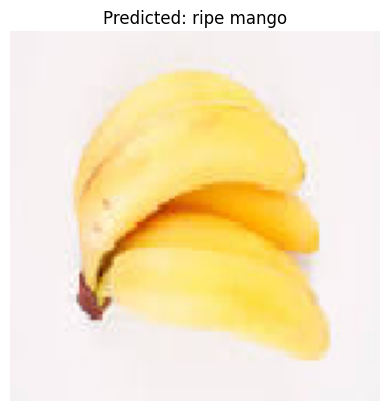

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img_width, img_height = 128, 128  # match model.input_shape

# Set image path
img_path = '/content/fruit_dataset/Ripe & Unripe Fruits/ripe banana/145.jpg'

# Load and preprocess image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction, axis=1)[0]
predicted_class = label_encoder.inverse_transform([predicted_index])[0]

# Display image with prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


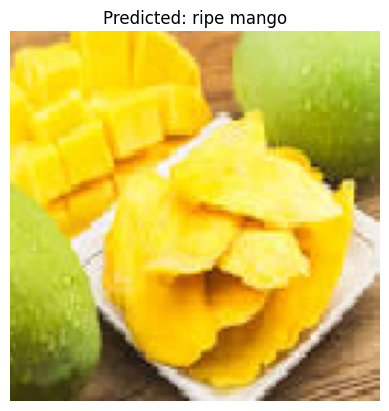

Predicted class: ripe mango


In [ ]:
img_width, img_height = 128, 128  # Match model.input_shape

# Path to your new test image (use any image from the dataset or upload a new one)
img_path = '/content/fruit_dataset/Ripe & Unripe Fruits/ripe mango/342.jpg'  # Change this path to a different image

# Load and preprocess image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction, axis=1)[0]
predicted_class = label_encoder.inverse_transform([predicted_index])[0]

# Display image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()

# Print the predicted class
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


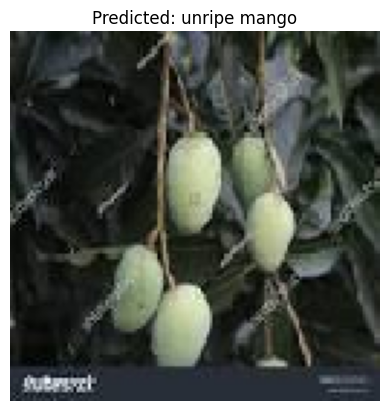

Predicted class: unripe mango


In [ ]:
img_width, img_height = 128, 128  # Match model.input_shape

# Path to your new test image (change the path to another image from your dataset)
img_path = '/content/fruit_dataset/Ripe & Unripe Fruits/unripe mango/217.jpg'  # Change to another image

# Load and preprocess image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction, axis=1)[0]
predicted_class = label_encoder.inverse_transform([predicted_index])[0]

# Display image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()

# Print the predicted class
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


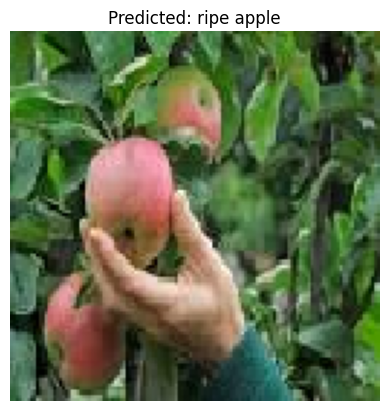

Predicted class: ripe apple


In [ ]:
img_width, img_height = 128, 128  # Match model.input_shape

# Path to your new test image (change the path to another image from your dataset)
img_path = '/content/fruit_dataset/Ripe & Unripe Fruits/ripe apple/342.jpg'  # Change to another image

# Load and preprocess image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction, axis=1)[0]
predicted_class = label_encoder.inverse_transform([predicted_index])[0]

# Display image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()

# Print the predicted class
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


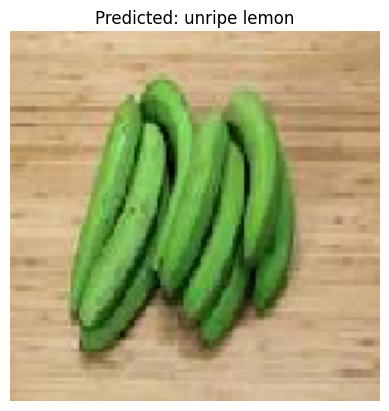

Predicted class: unripe lemon


In [ ]:
img_width, img_height = 128, 128  # Match model.input_shape

# Path to your new test image (change the path to another image from your dataset)
img_path = '/content/fruit_dataset/Ripe & Unripe Fruits/unripe banana/168.jpg'  # Change to another image

# Load and preprocess image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_index = np.argmax(prediction, axis=1)[0]
predicted_class = label_encoder.inverse_transform([predicted_index])[0]

# Display image and prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()

# Print the predicted class
print(f"Predicted class: {predicted_class}")


In [ ]:

import collections

folder_path = '/content/fruit_dataset/Ripe & Unripe Fruits'
fruit_folders = os.listdir(folder_path)

fruit_counts = {folder: len(os.listdir(os.path.join(folder_path, folder))) for folder in fruit_folders}
print(fruit_counts)


{'unripe pomegranate': 389, 'ripe banana': 400, 'unripe lemon': 396, 'ripe strawberry': 400, 'ripe papaya': 400, 'ripe pomegranate': 390, 'unripe strawberry': 400, 'unripe grapes': 397, 'unripe mango': 400, 'unripe apple': 391, 'unripe papaya': 400, 'ripe mango': 399, 'unripe pineapple': 380, 'ripe lemon': 386, 'unripe dragon': 400, 'ripe grapes': 398, 'unripe orange': 400, 'ripe apple': 388, 'unripe banana': 400, 'ripe orange': 400, 'ripe dragon': 399, 'ripe pineapple': 400}


In [ ]:
# Example: Save a model in .keras format
model.save('ripeness_detection.keras')  # or model.save('my_model.h5') for .h5 format


In [ ]:
from google.colab import files

# Download the file to your local machine
files.download('ripeness_detection.keras')  # change to 'my_model.h5' if needed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
import json
from google.colab import files

# Path to your dataset directory (change this if your dataset is in a different location)
dataset_path = '/content/fruit_dataset/Ripe & Unripe Fruits'

# Get the list of subfolders (these should correspond to the classes)
class_names = sorted(os.listdir(dataset_path))

# Verify the class names
print("Class names (sorted):", class_names)

# Create a dictionary with class names as keys and indices as values
class_dict = {class_name: index for index, class_name in enumerate(class_names)}

# Path to save the JSON file
json_path = '/content/fruit_dataset/Ripe & Unripe Fruits/classes.json'

# Save the class dictionary to a JSON file
with open(json_path, 'w') as f:
    json.dump(class_dict, f, indent=4)

# Download the classes.json file
files.download(json_path)

print(f"Classes saved and downloaded as {json_path}")


Class names (sorted): ['ripe apple', 'ripe banana', 'ripe dragon', 'ripe grapes', 'ripe lemon', 'ripe mango', 'ripe orange', 'ripe papaya', 'ripe pineapple', 'ripe pomegranate', 'ripe strawberry', 'unripe apple', 'unripe banana', 'unripe dragon', 'unripe grapes', 'unripe lemon', 'unripe mango', 'unripe orange', 'unripe papaya', 'unripe pineapple', 'unripe pomegranate', 'unripe strawberry']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classes saved and downloaded as /content/fruit_dataset/Ripe & Unripe Fruits/classes.json
